In [1]:
from astropy.io import fits
from astropy.visualization import quantity_support
from os.path import join as jp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fits_path = '../fits'

file = jp(fits_path, 'sn.fits')

pla = dict()

In [3]:
pla[2] = fits.open(jp(fits_path,'pla0002.mt'))
pla[3] = fits.open(jp(fits_path,'pla0003.mt'))

In [4]:
sn = fits.open(jp(fits_path,'sn.mt'))

In [5]:
pla[2][0].header

SIMPLE  =                    T / Standard FITS format: NOST 100-2.0             
BITPIX  =                  -32 / No. of bits per pixel                          
NAXIS   =                    1 / No. of axes in image                           
NAXIS1  =                 1461 / No. of pixels                                  
EXTEND  =                    T / FITS extension may be present                  
COMMENT NOST 100-2.0: Hanisch,R. et al. 2001, Astron. & Astrophys. 376, 559     
                                                                                
CRPIX1  =                   1. / Reference pixel                                
CRVAL1  =                2200. / Coordinate at reference pixel                  
CDELT1  =                   5. / Coord. incr. per pixel (original value)        
CTYPE1  = '                '   / Units of coordinate                            
BUNIT   = '                '   / Units of data values                           
DATAMAX =       0.2049001753

In [6]:
pla[3][0].header

SIMPLE  =                    T / Standard FITS format: NOST 100-2.0             
BITPIX  =                  -32 / No. of bits per pixel                          
NAXIS   =                    1 / No. of axes in image                           
NAXIS1  =                 1461 / No. of pixels                                  
EXTEND  =                    T / FITS extension may be present                  
COMMENT NOST 100-2.0: Hanisch,R. et al. 2001, Astron. & Astrophys. 376, 559     
                                                                                
CRPIX1  =                   1. / Reference pixel                                
CRVAL1  =                2200. / Coordinate at reference pixel                  
CDELT1  =                   5. / Coord. incr. per pixel (original value)        
CTYPE1  = '                '   / Units of coordinate                            
BUNIT   = '                '   / Units of data values                           
DATAMAX =       0.3159949779

In [7]:
hdr = pla[3][0].header

In [8]:
n    = hdr['NAXIS1']
lo   = hdr['CRVAL1']
step = hdr['CDELT1']

In [9]:
lmb = np.arange(lo, lo + n * step, step)

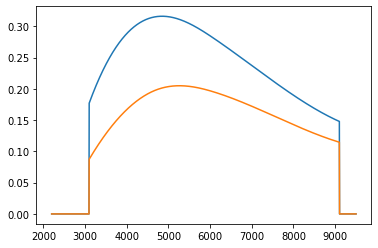

In [10]:
plt.plot(lmb, pla[3][0].data)
plt.plot(lmb, pla[2][0].data)

In [11]:
from astropy.modeling import models
from astropy import units as u

bb = models.BlackBody

In [12]:
# with quantity_support():
#    plt.figure()
#    plt.semilogx(lmb_AA, spec)
    #plt.axvline(p6000.nu_max.to(u.AA, equivalencies=u.spectral()).value, ls='--')
#    plt.show()

In [13]:
from astropy.constants import b_wien

In [14]:
temperature = b_wien / (6000 * u.AA)

In [41]:
bb(temperature)(lmb * u.AA).to(u.erg / (u.AA * u.sr * u.cm**2 * u.s), equivalencies=u.spectral())

UnitConversionError: 'erg / (cm2 Hz s sr)' and 'erg / (Angstrom cm2 s sr)' are not convertible

In [28]:
bb(6000*u.K).nu_max.to(u.AA, equivalencies=u.spectral())

<Quantity 8499.07220222 Angstrom>

In [36]:
bb(6000*u.K).lambda_max

<Quantity 4.82961993e-07 m>